<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,69.341485,0.341195,79.682680,79.313942,0.368738
1,0.0,1.0,48.404833,-0.751018,57.653816,58.350231,-0.696415
2,0.0,2.0,50.305915,0.321925,60.627840,60.253770,0.374071
3,0.0,3.0,36.460388,0.149868,46.610256,46.390348,0.219908
4,0.0,4.0,72.049382,0.308431,82.357813,82.025339,0.332474
...,...,...,...,...,...,...,...
119995,999.0,115.0,71.785717,0.291058,82.076775,81.791133,0.285642
119996,999.0,116.0,49.716295,-0.123539,59.592756,59.730024,-0.137268
119997,999.0,117.0,67.028577,-0.609643,76.418934,77.035785,-0.616851
119998,999.0,118.0,83.238657,-0.424492,92.814164,93.239759,-0.425595


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,69.341485,0.341195,79.682680,79.313942,0.368738
1,0.0,1.0,48.404833,-0.751018,57.653816,58.350231,-0.696415
2,0.0,2.0,50.305915,0.321925,60.627840,60.253770,0.374071
3,0.0,3.0,36.460388,0.149868,46.610256,46.390348,0.219908
4,0.0,4.0,72.049382,0.308431,82.357813,82.025339,0.332474
...,...,...,...,...,...,...,...
119995,999.0,115.0,71.785717,0.291058,82.076775,81.791133,0.285642
119996,999.0,116.0,49.716295,-0.123539,59.592756,59.730024,-0.137268
119997,999.0,117.0,67.028577,-0.609643,76.418934,77.035785,-0.616851
119998,999.0,118.0,83.238657,-0.424492,92.814164,93.239759,-0.425595


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    69.341485  0.341195  79.682680  79.313942  0.368738
      1.0    48.404833 -0.751018  57.653816  58.350231 -0.696415
      2.0    50.305915  0.321925  60.627840  60.253770  0.374071
      3.0    36.460388  0.149868  46.610256  46.390348  0.219908
      4.0    72.049382  0.308431  82.357813  82.025339  0.332474
...                ...       ...        ...        ...       ...
999.0 115.0  71.785717  0.291058  82.076775  81.791133  0.285642
      116.0  49.716295 -0.123539  59.592756  59.730024 -0.137268
      117.0  67.028577 -0.609643  76.418934  77.035785 -0.616851
      118.0  83.238657 -0.424492  92.814164  93.239759 -0.425595
      119.0  23.802200 -0.393028  33.409171  33.825689 -0.416518

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    69.341485  0.341195  79.682680  79.313942  0.368738
      1.0    48.404833 -0.751018  57.653816  58.350231 -0.696415
      2.0    50.305915  0.321925  60.627840  60.253770  0.374071
      3.0    36.460388  0.149868  46.610256  46.390348  0.219908
      4.0    72.049382  0.308431  82.357813  82.025339  0.332474
...                ...       ...        ...        ...       ...
999.0 115.0  71.785717  0.291058  82.076775  81.791133  0.285642
      116.0  49.716295 -0.123539  59.592756  59.730024 -0.137268
      117.0  67.028577 -0.609643  76.418934  77.035785 -0.616851
      118.0  83.238657 -0.424492  92.814164  93.239759 -0.425595
      119.0  23.802200 -0.393028  33.409171  33.825689 -0.416518

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,69.341485,0.341195,79.682680,79.313942,0.368738
1,0.0,1.0,48.404833,-0.751018,57.653816,58.350231,-0.696415
2,0.0,2.0,50.305915,0.321925,60.627840,60.253770,0.374071
3,0.0,3.0,36.460388,0.149868,46.610256,46.390348,0.219908
4,0.0,4.0,72.049382,0.308431,82.357813,82.025339,0.332474
...,...,...,...,...,...,...,...
119995,999.0,115.0,71.785717,0.291058,82.076775,81.791133,0.285642
119996,999.0,116.0,49.716295,-0.123539,59.592756,59.730024,-0.137268
119997,999.0,117.0,67.028577,-0.609643,76.418934,77.035785,-0.616851
119998,999.0,118.0,83.238657,-0.424492,92.814164,93.239759,-0.425595


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    69.341485  0.341195  79.682680  79.313942  0.368738
      1.0    48.404833 -0.751018  57.653816  58.350231 -0.696415
      2.0    50.305915  0.321925  60.627840  60.253770  0.374071
      3.0    36.460388  0.149868  46.610256  46.390348  0.219908
      4.0    72.049382  0.308431  82.357813  82.025339  0.332474
...                ...       ...        ...        ...       ...
999.0 115.0  71.785717  0.291058  82.076775  81.791133  0.285642
      116.0  49.716295 -0.123539  59.592756  59.730024 -0.137268
      117.0  67.028577 -0.609643  76.418934  77.035785 -0.616851
      118.0  83.238657 -0.424492  92.814164  93.239759 -0.425595
      119.0  23.802200 -0.393028  33.409171  33.825689 -0.416518

[120000 rows x 5 columns]

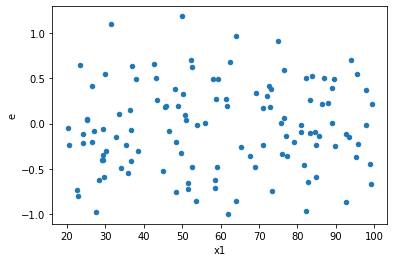

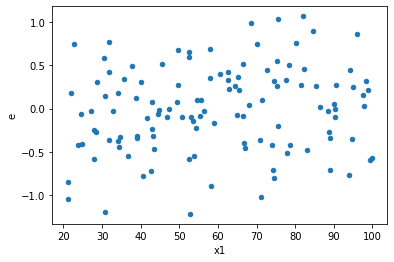

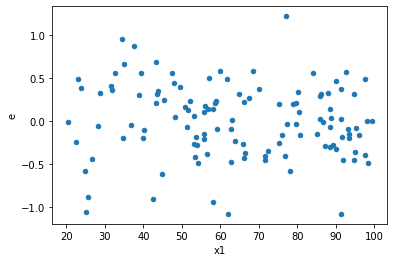

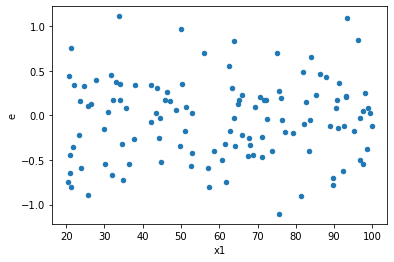

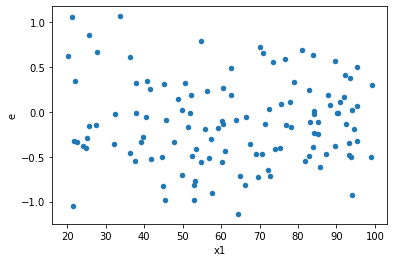

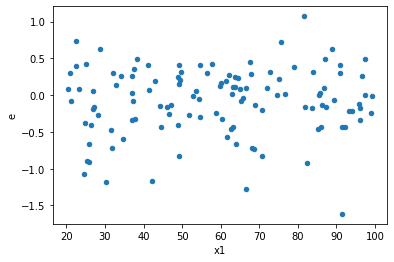

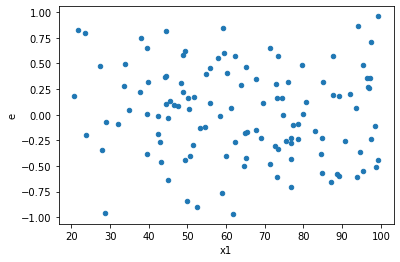

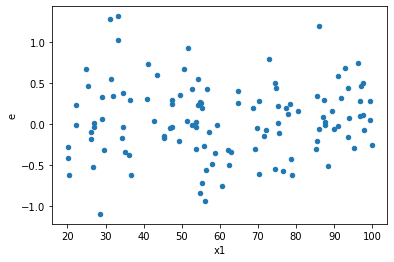

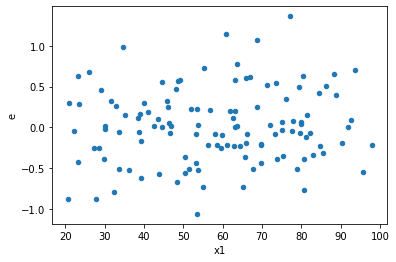

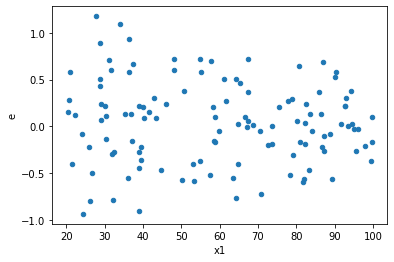

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,47.0,47.0,9.762468438777843,13.290389841572456,0.20771209444208175,0.2827742519483501,1.3613759598731436,0.2938110108565364,0.8530944945717318,0.1469055054282682,Reject001=1 : Homoscedasticity
5.0,47.0,47.0,10.822607367691031,11.310975220067249,0.2302682418657666,0.24065904723547338,1.0451247870115064,0.8803835888047298,0.5598082055976351,0.4401917944023649,Reject001=1 : Homoscedasticity
8.0,47.0,47.0,9.031593219175791,9.773105197265728,0.19216155785480407,0.2079384084524623,1.0821020123576388,0.7879259753026222,0.6060370123486889,0.3939629876513111,Reject001=1 : Homoscedasticity
26.0,47.0,47.0,8.532197779427147,9.017221259767268,0.18153612296653504,0.19185577148440996,1.0568462537881635,0.8504810416256157,0.5747594791871922,0.42524052081280783,Reject001=1 : Homoscedasticity
27.0,47.0,47.0,7.917178884535753,7.957776216339738,0.16845061456459048,0.16931438758169656,1.0051277522455988,0.9860862956210164,0.5069568521894918,0.4930431478105082,Reject001=1 : Homoscedasticity
29.0,47.0,47.0,7.8070003522060425,10.532593406699782,0.166106390472469,0.22409773205744216,1.3491216768964998,0.3081350690337268,0.8459324654831366,0.1540675345168634,Reject001=1 : Homoscedasticity
34.0,47.0,47.0,10.925476921559405,11.198863388659397,0.23245695577785966,0.23827368912041272,1.025022840564563,0.9328434110704209,0.5335782944647895,0.46642170553521045,Reject001=1 : Homoscedasticity
50.0,47.0,47.0,9.010249618130022,9.083923159123936,0.19170743868361748,0.19327496083242415,1.0081766370651564,0.9778487672003313,0.5110756163998343,0.48892438360016566,Reject001=1 : Homoscedasticity
57.0,47.0,47.0,9.334963123848707,9.56933200481976,0.19861623667763206,0.2036028086131864,1.025106567413458,0.9326220002036492,0.5336889998981754,0.4663110001018246,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,9.82229283640296,8.553389958898405,0.20898495396602043,0.18198702040209372,0.870813984205215,0.6373132454531925,Reject001=1 : Homoscedasticity
1.0,47.0,47.0,9.762468438777843,13.290389841572456,0.20771209444208175,0.2827742519483501,1.3613759598731436,0.2938110108565364,Reject001=1 : Homoscedasticity
2.0,47.0,47.0,9.674430789719512,6.537251414674753,0.2058389529727556,0.13909045563137773,0.6757246557204721,0.18277532919426528,Reject001=1 : Homoscedasticity
3.0,47.0,47.0,9.39398298785611,9.026174604569324,0.1998719784650236,0.19204626818232604,0.9608463860577283,0.8916796417838635,Reject001=1 : Homoscedasticity
4.0,47.0,47.0,12.380556198879628,7.322694126892161,0.2634160893378644,0.15580200269983321,0.5914672983395386,0.07499514201847522,Reject001=1 : Homoscedasticity
5.0,47.0,47.0,10.822607367691031,11.310975220067249,0.2302682418657666,0.24065904723547338,1.0451247870115064,0.8803835888047298,Reject001=1 : Homoscedasticity
6.0,47.0,47.0,8.854220494478705,8.42139476695769,0.1883876700952916,0.17917861206292957,0.9511164503085375,0.8643194757679886,Reject001=1 : Homoscedasticity
7.0,47.0,47.0,10.831843810824891,6.763347901598419,0.2304647619324445,0.14390101918294507,0.6243948878619734,0.10991896882896132,Reject001=1 : Homoscedasticity
8.0,47.0,47.0,9.031593219175791,9.773105197265728,0.19216155785480407,0.2079384084524623,1.0821020123576388,0.7879259753026222,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      937
Reject001=0 : Heteroscedasticity     63
Name: Result_test, dtype: int64